# FOREST FIRE

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

In [6]:
forest=pd.read_csv('forestfires (1).csv')

## EDA

In [7]:
forest.shape

(517, 31)

In [8]:
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [9]:
forest.tail()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small
516,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,...,0,0,0,0,0,0,1,0,0,small


In [12]:
pd.set_option('display.max_columns', None)
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


In [13]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [18]:
forest_1=forest[~forest.duplicated()]

In [19]:
forest_1.reset_index(inplace=True)

In [20]:
forest_1

,index,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
505,513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
506,514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
507,515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


In [21]:
forest_1=forest_1.drop('index',axis=1)
forest_1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
505,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
506,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
507,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


<AxesSubplot:>

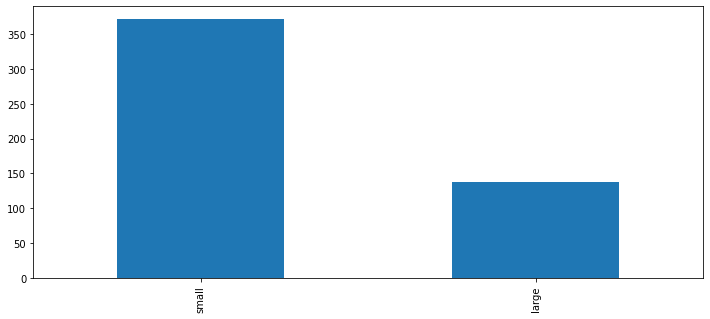

In [22]:
plt.figure(figsize=(12,5))
forest_1.size_category.value_counts().plot.bar()

<AxesSubplot:>

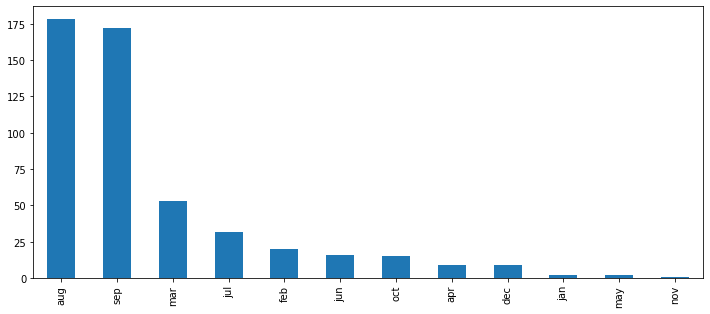

In [23]:
plt.figure(figsize=(12,5))
forest_1.month.value_counts().plot.bar()

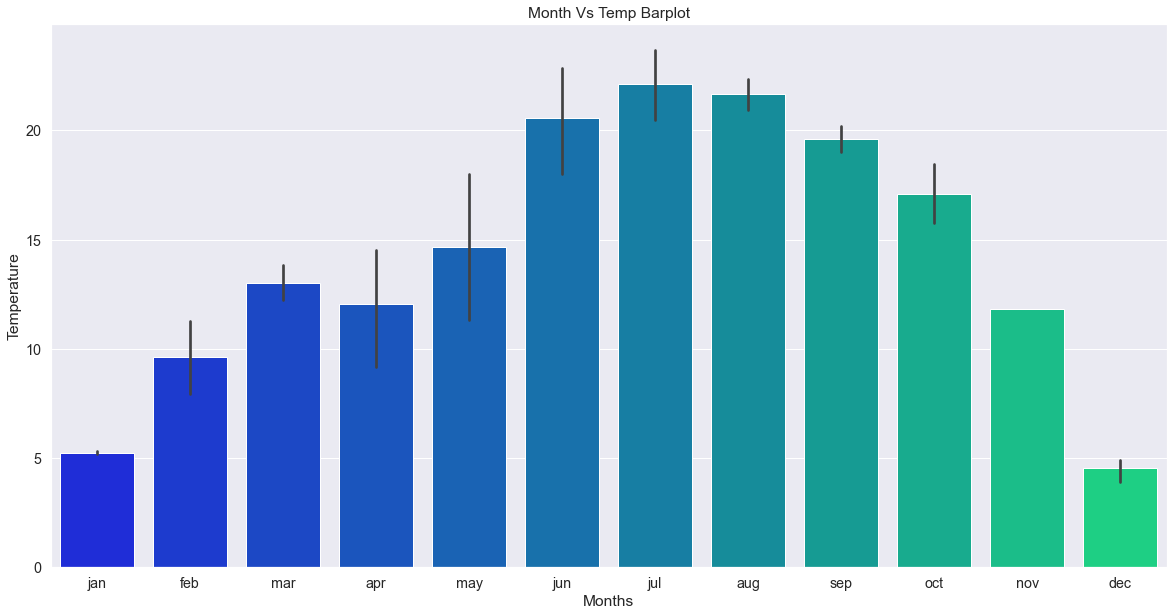

In [29]:
# Plotting Month Vs. temp plot


plt.rcParams['figure.figsize'] = [20, 10]
sns.set(style = "darkgrid", font_scale = 1.3)
month_temp = sns.barplot(x = 'month', y = 'temp', data = forest_1,
                         order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], palette = 'winter');
month_temp.set(title = "Month Vs Temp Barplot", xlabel = "Months", ylabel = "Temperature");

## Preprocessing

In [30]:
forest_2= forest_1.iloc[:,2:30]

In [31]:
forest_2

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
505,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
506,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
507,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [32]:
scaler = StandardScaler()

In [35]:
forest_norm=scaler.fit_transform(forest_2)

In [36]:
# number of columns are more need to use PCA 

In [41]:
pca=PCA(n_components=28)
pca_values=pca.fit_transform(forest_norm)
pca_values

array([[ 3.75397242e+00, -1.28931864e+00, -8.75381400e-01, ...,
        -6.46896939e-02,  4.36279039e-15, -1.01732839e-15],
       [ 3.80252163e-01,  7.93234886e-01, -1.13373932e+00, ...,
         3.38555037e-02, -7.69548534e-15, -3.73595640e-16],
       [ 6.61966478e-01,  1.14867222e+00, -1.19498731e+00, ...,
         2.75936820e-02, -5.06799819e-16,  1.40614831e-15],
       ...,
       [ 9.30557831e-01, -2.58780463e-01,  2.72948746e+00, ...,
        -3.01077280e-01,  5.02116656e-16, -6.57215697e-17],
       [-1.62707928e+00, -9.81426536e-01,  4.03873956e-01, ...,
         3.43662358e-02,  3.60330016e-16,  8.14056207e-17],
       [ 4.05704813e+00, -3.65854834e-01, -3.77790131e-01, ...,
        -2.51066990e-02, -1.05942665e-16, -1.08647075e-17]])

In [42]:
variance = pca.explained_variance_ratio_
variance

array([1.35679861e-01, 6.86304793e-02, 6.19524620e-02, 5.35834443e-02,
       4.74831741e-02, 4.68198775e-02, 4.36569624e-02, 4.28252784e-02,
       4.07424681e-02, 4.01999842e-02, 3.93456312e-02, 3.83337057e-02,
       3.64885130e-02, 3.62973143e-02, 3.57074619e-02, 3.49977780e-02,
       3.35241673e-02, 3.25086440e-02, 3.07199314e-02, 3.00762122e-02,
       2.34863017e-02, 2.08579572e-02, 1.18330651e-02, 8.92711776e-03,
       4.52514829e-03, 7.97059751e-04, 2.67581345e-32, 1.47646648e-33])

In [43]:
variance_1 = np.cumsum(np.round(variance,decimals = 4)*100)
variance_1

array([13.57, 20.43, 26.63, 31.99, 36.74, 41.42, 45.79, 50.07, 54.14,
       58.16, 62.09, 65.92, 69.57, 73.2 , 76.77, 80.27, 83.62, 86.87,
       89.94, 92.95, 95.3 , 97.39, 98.57, 99.46, 99.91, 99.99, 99.99,
       99.99])

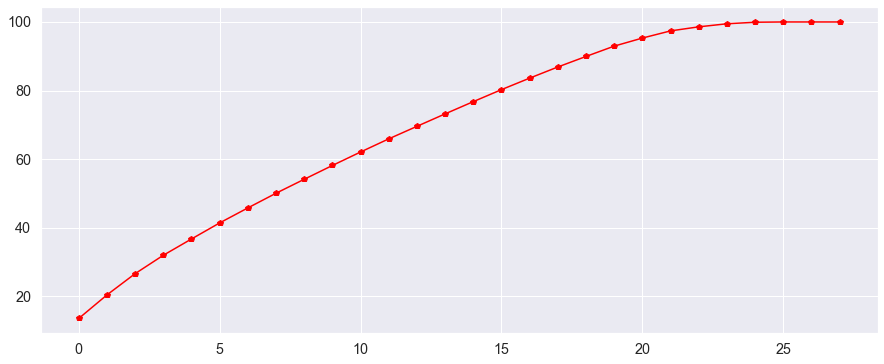

In [44]:
# Variance graph of PCA
plt.figure(figsize=(15,6))
plt.plot(variance_1,color='red',marker='p')

In [45]:
# slecting first 25 pca out of 28
final=pd.concat([pd.DataFrame(pca_values[:,:25]),forest_1[['size_category']]],axis=1)
final.size_category.replace(('large','small'),(1,0),inplace=True)

In [46]:
final

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,size_category
0,3.753972,-1.289319,-0.875381,-2.057203,-1.539565,0.525262,0.175580,-0.013656,-0.048815,-0.455360,0.412832,1.298344,-0.545239,-0.556329,-0.295589,-0.172690,-0.015770,0.617097,0.442868,-0.520640,-0.941988,-0.434493,-0.103097,-0.027117,-0.247662,0
1,0.380252,0.793235,-1.133739,1.511056,2.695340,1.307453,-2.701150,0.394590,-0.575579,0.159513,3.023977,-0.359222,-1.367010,1.816828,-0.899973,-2.497825,0.437228,0.679929,-1.027684,-1.359530,-0.898012,0.823984,0.221564,0.289076,0.097744,0
2,0.661966,1.148672,-1.194987,2.499254,0.939840,0.513138,-1.769094,-1.907318,-0.082289,0.292203,3.473222,-0.307193,-1.252620,1.778173,-0.959708,-2.539273,-0.721879,-0.296456,0.591026,-1.368595,-0.346942,0.725410,0.110888,0.355542,-0.384121,0
3,3.369783,-1.114478,0.348462,-2.201644,-2.081776,0.724578,-0.402971,-0.193619,-0.669534,-1.281672,-0.058304,1.025056,-0.716653,-0.239667,0.536274,-0.030154,0.034921,0.289695,0.770581,-1.821270,-0.860501,1.493872,-0.332142,-0.378250,1.142589,0
4,2.983335,-0.834919,1.337751,-0.041757,-1.087638,-0.795127,-0.832519,0.519465,0.697278,-1.994983,0.319614,1.162575,-0.071786,-0.596982,0.504038,0.816212,1.056955,-0.683917,0.431060,-1.927667,-0.697452,1.997097,-0.535772,0.177156,1.454403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,-0.093232,0.113069,1.292821,1.506902,0.544380,-1.016410,-0.149738,0.849740,0.685424,-0.372472,1.039952,0.219833,0.300512,-0.247504,-0.768037,0.300026,0.541820,0.466450,0.339362,1.867316,-1.424191,-0.860211,-1.217031,-0.682027,0.092838,1
505,0.802495,-0.084618,2.688642,0.225348,0.390693,-0.831450,0.083194,0.178129,1.238868,-0.228236,0.769589,-0.056949,0.484614,-0.202784,-0.278037,0.350106,0.526695,0.539276,0.390010,0.008163,-0.917800,-1.368263,-1.281017,-1.193708,0.582727,1
506,0.930558,-0.258780,2.729487,-0.077863,0.423724,-0.888077,-0.023792,0.212013,1.190787,-0.246062,0.765835,-0.017635,0.221811,-0.198835,-0.466074,0.322612,0.376733,0.076586,0.353063,0.134062,-0.718433,-1.745729,-1.181496,-1.214221,0.491187,1
507,-1.627079,-0.981427,0.403874,1.211603,-0.527529,0.709734,0.634502,-1.490876,0.068663,-0.052213,0.543014,0.251698,0.243766,0.074894,-0.158461,0.001578,-1.045889,-0.810348,-0.075929,0.498942,0.052525,-0.066572,-0.057817,-0.309163,0.413763,0


In [48]:
# Spliting data
array = final.values
x = array[:,0:25]
y= array[:,25]

## Model Building

In [57]:
model = Sequential()
model.add(Dense(12, input_dim=25, activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [60]:
#compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(x, y, validation_split=0.3, epochs=200, batch_size=10)

Epoch 1/200
36/36 [==============================] - 1s 4ms/step - loss: 0.0053 - accuracy: 0.9972 - val_loss: 2.4566 - val_accuracy: 0.8431
Epoch 2/200
36/36 [==============================] - 0s 2ms/step - loss: 0.0066 - accuracy: 0.9972 - val_loss: 2.4129 - val_accuracy: 0.8301
Epoch 3/200
36/36 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 2.4521 - val_accuracy: 0.8366
Epoch 4/200
36/36 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 0.9972 - val_loss: 2.4249 - val_accuracy: 0.8301
Epoch 5/200
36/36 [==============================] - 0s 2ms/step - loss: 0.0064 - accuracy: 0.9972 - val_loss: 2.4357 - val_accuracy: 0.8366
Epoch 6/200
36/36 [==============================] - 0s 2ms/step - loss: 0.0068 - accuracy: 0.9972 - val_loss: 2.4726 - val_accuracy: 0.8366
Epoch 7/200
36/36 [==============================] - 0s 2ms/step - loss: 0.0109 - accuracy: 0.9944 - val_loss: 2.3889 - val_accuracy: 0.8366
Epoch 8/200
3

In [67]:
# Accuracy
scores = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

16/16 [==============================] - 0s 1ms/step - loss: 0.8963 - accuracy: 0.9528
accuracy: 95.28%
